### Importing packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


### Loading Data

In [2]:
data=pd.read_csv("train new.csv",low_memory=False)

### Exploratory Data Analysis

In [3]:
data.head()

,Store,Date,Sales
0,1,01-01-2013,0
1,1,02-01-2013,5530
2,1,03-01-2013,4327
3,1,04-01-2013,4486
4,1,05-01-2013,4997


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   942 non-null    int64 
 1   Date    942 non-null    object
 2   Sales   942 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


### Data cleaning 

#### Change date to DateTime

In [5]:
data['Date']=pd.to_datetime(data['Date'])
data.dtypes


Store             int64
Date     datetime64[ns]
Sales             int64
dtype: object

In [6]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['week'] = data['Date'].dt.week
data['weekofyear'] = data['Date'].dt.weekofyear
data['dayofweek'] = data['Date'].dt.dayofweek
data['weekday'] = data['Date'].dt.weekday
data['dayofyear'] = data['Date'].dt.dayofyear
data['quarter'] = data['Date'].dt.quarter

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Store       942 non-null    int64         
 1   Date        942 non-null    datetime64[ns]
 2   Sales       942 non-null    int64         
 3   year        942 non-null    int64         
 4   month       942 non-null    int64         
 5   day         942 non-null    int64         
 6   week        942 non-null    int64         
 7   weekofyear  942 non-null    int64         
 8   dayofweek   942 non-null    int64         
 9   weekday     942 non-null    int64         
 10  dayofyear   942 non-null    int64         
 11  quarter     942 non-null    int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 88.4 KB


#### Drop date column

In [8]:
del data['Date']
del data['Store']

#### Deleting rows where sales values is 0

In [9]:
data=data[data.Sales!=0]
data

,Sales,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter
1,5530,2013,2,1,5,5,4,4,32,1
2,4327,2013,3,1,9,9,4,4,60,1
3,4486,2013,4,1,14,14,0,0,91,2
4,4997,2013,5,1,18,18,2,2,121,2
6,7176,2013,7,1,27,27,0,0,182,3
...,...,...,...,...,...,...,...,...,...,...
937,6102,2015,7,27,31,31,0,0,208,3
938,5011,2015,7,28,31,31,1,1,209,3
939,4782,2015,7,29,31,31,2,2,210,3
940,5020,2015,7,30,31,31,3,3,211,3


### Data preprocessing 

#### Manually creating additional feature columns

In [10]:
data['Sale_previous_day']=data['Sales'].shift(+1)

data['Sale_2days_back']=data['Sales'].shift(+2)

data['Sale_3days_back']=data['Sales'].shift(+3)

data['Sale_4days_back']=data['Sales'].shift(+4)

data['Sale_5days_back']=data['Sales'].shift(+5)

data

,Sales,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,Sale_previous_day,Sale_2days_back,Sale_3days_back,Sale_4days_back,Sale_5days_back
1,5530,2013,2,1,5,5,4,4,32,1,NaN,NaN,NaN,NaN,NaN
2,4327,2013,3,1,9,9,4,4,60,1,5530.0,NaN,NaN,NaN,NaN
3,4486,2013,4,1,14,14,0,0,91,2,4327.0,5530.0,NaN,NaN,NaN
4,4997,2013,5,1,18,18,2,2,121,2,4486.0,4327.0,5530.0,NaN,NaN
6,7176,2013,7,1,27,27,0,0,182,3,4997.0,4486.0,4327.0,5530.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,6102,2015,7,27,31,31,0,0,208,3,4364.0,3706.0,3769.0,3464.0,3558.0
938,5011,2015,7,28,31,31,1,1,209,3,6102.0,4364.0,3706.0,3769.0,3464.0
939,4782,2015,7,29,31,31,2,2,210,3,5011.0,6102.0,4364.0,3706.0,3769.0
940,5020,2015,7,30,31,31,3,3,211,3,4782.0,5011.0,6102.0,4364.0,3706.0


#### Dropping all the NaN values

In [11]:
data=data.dropna()
data

,Sales,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,Sale_previous_day,Sale_2days_back,Sale_3days_back,Sale_4days_back,Sale_5days_back
7,5580,2013,8,1,31,31,3,3,213,3,7176.0,4997.0,4486.0,4327.0,5530.0
8,5471,2013,9,1,35,35,6,6,244,3,5580.0,7176.0,4997.0,4486.0,4327.0
9,4892,2013,10,1,40,40,1,1,274,4,5471.0,5580.0,7176.0,4997.0,4486.0
10,4881,2013,11,1,44,44,4,4,305,4,4892.0,5471.0,5580.0,7176.0,4997.0
11,4952,2013,12,1,48,48,6,6,335,4,4881.0,4892.0,5471.0,5580.0,7176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,6102,2015,7,27,31,31,0,0,208,3,4364.0,3706.0,3769.0,3464.0,3558.0
938,5011,2015,7,28,31,31,1,1,209,3,6102.0,4364.0,3706.0,3769.0,3464.0
939,4782,2015,7,29,31,31,2,2,210,3,5011.0,6102.0,4364.0,3706.0,3769.0
940,5020,2015,7,30,31,31,3,3,211,3,4782.0,5011.0,6102.0,4364.0,3706.0


In [12]:
features=data.drop('Sales',axis=1)
features

,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,Sale_previous_day,Sale_2days_back,Sale_3days_back,Sale_4days_back,Sale_5days_back
7,2013,8,1,31,31,3,3,213,3,7176.0,4997.0,4486.0,4327.0,5530.0
8,2013,9,1,35,35,6,6,244,3,5580.0,7176.0,4997.0,4486.0,4327.0
9,2013,10,1,40,40,1,1,274,4,5471.0,5580.0,7176.0,4997.0,4486.0
10,2013,11,1,44,44,4,4,305,4,4892.0,5471.0,5580.0,7176.0,4997.0
11,2013,12,1,48,48,6,6,335,4,4881.0,4892.0,5471.0,5580.0,7176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2015,7,27,31,31,0,0,208,3,4364.0,3706.0,3769.0,3464.0,3558.0
938,2015,7,28,31,31,1,1,209,3,6102.0,4364.0,3706.0,3769.0,3464.0
939,2015,7,29,31,31,2,2,210,3,5011.0,6102.0,4364.0,3706.0,3769.0
940,2015,7,30,31,31,3,3,211,3,4782.0,5011.0,6102.0,4364.0,3706.0


#### Extracting the feature names and save as a feature list for importances

In [13]:
feature_list=list(features.columns)
feature_list

['year',
 'month',
 'day',
 'week',
 'weekofyear',
 'dayofweek',
 'weekday',
 'dayofyear',
 'quarter',
 'Sale_previous_day',
 'Sale_2days_back',
 'Sale_3days_back',
 'Sale_4days_back',
 'Sale_5days_back']

#### Correlation

<AxesSubplot:>

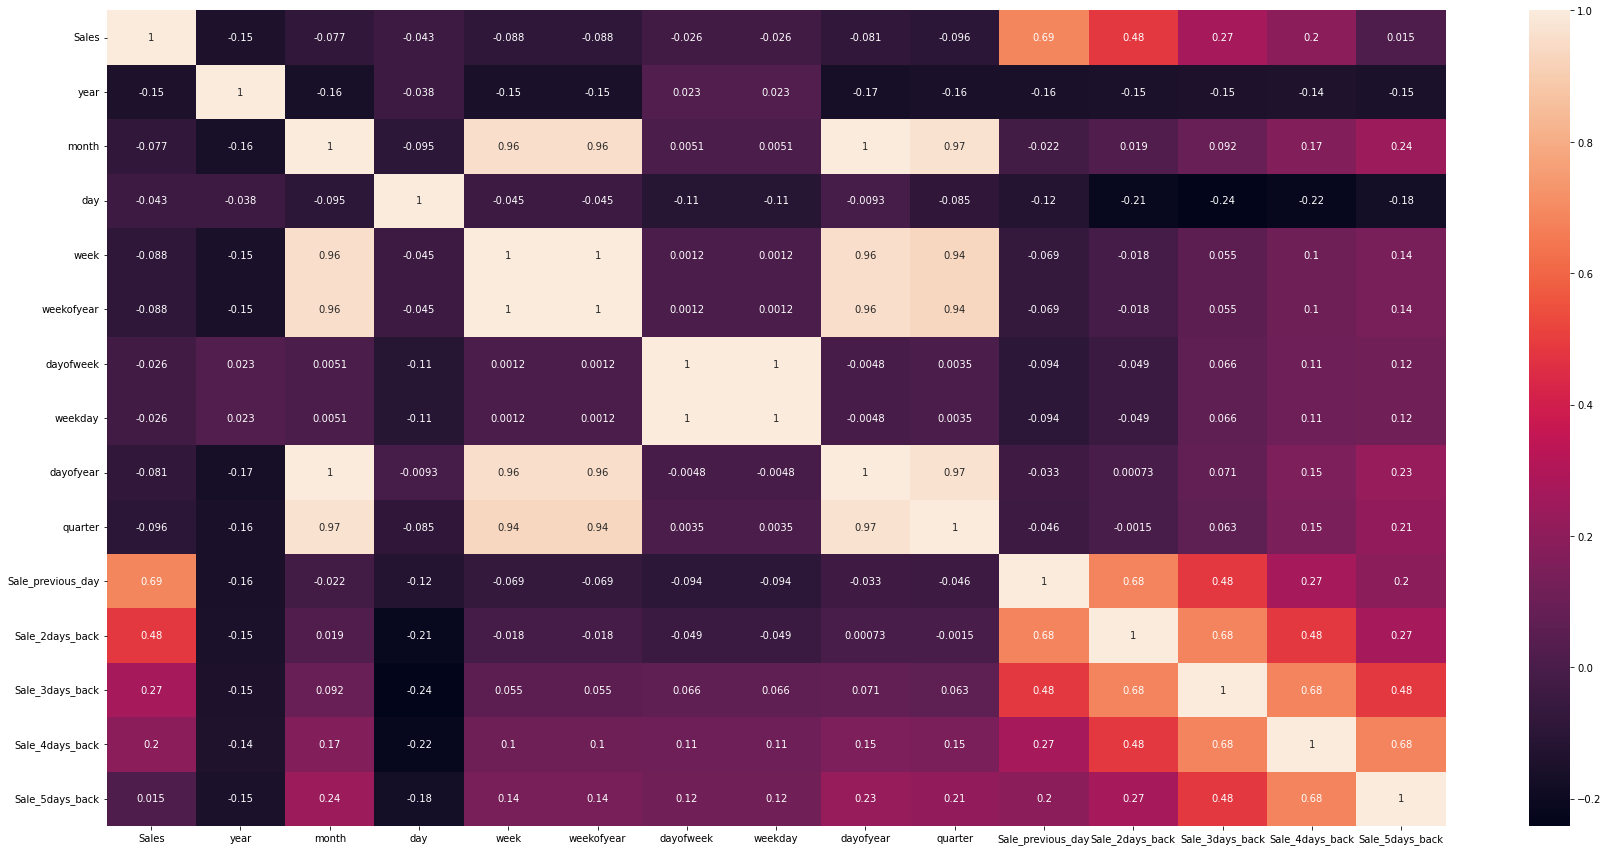

In [14]:
import seaborn as sns
plt.figure(figsize=(30,15))
correlation = data.corr()
sns.heatmap(correlation, annot=True)

#### Extracting the labels and the features as an array

In [15]:
labels=np.array(data['Sales'])

features=np.array(features)

#### Split the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)

#### Scaling the data 

In [17]:
train_labels=train_labels.astype('float64')

### Instantiate random forest model

In [18]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=42,n_jobs=-1)

#### Creating a params dictionary for Grid Search

In [19]:
#number of trees in random forest
n_estimators=[50,100,200,300,400,500,600,700,800,900,1000]

#number of features to consider at every split 
max_features=[2,4,6,8,10,12,14]

#maximum number of levels in a tree
max_depth=[5,10,15,20,25]

In [20]:
# create the param grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth}
print(param_grid)

{'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [2, 4, 6, 8, 10, 12, 14], 'max_depth': [5, 10, 15, 20, 25]}


#### Finding the best parameter with GridSearch CV

In [21]:
from sklearn.model_selection import GridSearchCV 

rf_Grid=GridSearchCV(estimator=reg,param_grid=param_grid,cv=10,verbose=2,n_jobs=-1)


In [22]:
rf_Grid.fit(train_features, train_labels)

Fitting 10 folds for each of 385 candidates, totalling 3850 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_features': [2, 4, 6, 8, 10, 12, 14],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=2)

In [23]:
rf_Grid.best_params_

{'max_depth': 15, 'max_features': 10, 'n_estimators': 50}

### Instantiating the random forest model with the new parameters

In [24]:
reg_opt=RandomForestRegressor(random_state=42,max_depth=15,max_features=10,n_estimators=50)

In [25]:
#training the model with the training data
reg_opt.fit(train_features, train_labels)

RandomForestRegressor(max_depth=15, max_features=10, n_estimators=50,
                      random_state=42)

In [26]:
pred=reg_opt.predict(test_features)
pred

array([4718.4839011 , 5388.52      , 5766.7692735 , 4058.39305653,
       5721.06847763, 4642.16      , 4290.84      , 4226.59166667,
       5115.59650297, 3924.36309783, 5583.063     , 5413.5240873 ,
       5559.02      , 4211.66581982, 3853.487203  , 5911.54      ,
       5277.94      , 6257.92666667, 4128.93491667, 6319.08      ,
       5140.7       , 3566.70635714, 6590.24      , 5225.768     ,
       5947.58733333, 3882.385421  , 4366.16564103, 4574.61808333,
       4713.16031746, 3653.42872533, 4300.52427273, 4393.481     ,
       7763.76      , 3985.65948413, 5401.09333333, 3720.09203128,
       3876.08487319, 3691.02396057, 5152.05355633, 4465.1344866 ,
       7080.64      , 5413.        , 4324.71875   , 5230.11      ,
       6086.28      , 5275.04217172, 5539.88952381, 5419.648     ,
       5220.91428571, 5313.64533333, 6043.88      , 6326.05      ,
       4928.84647839, 3642.57932082, 5434.72666667, 4302.29660967,
       3482.37846729, 5631.524     , 4531.225     , 3952.40959

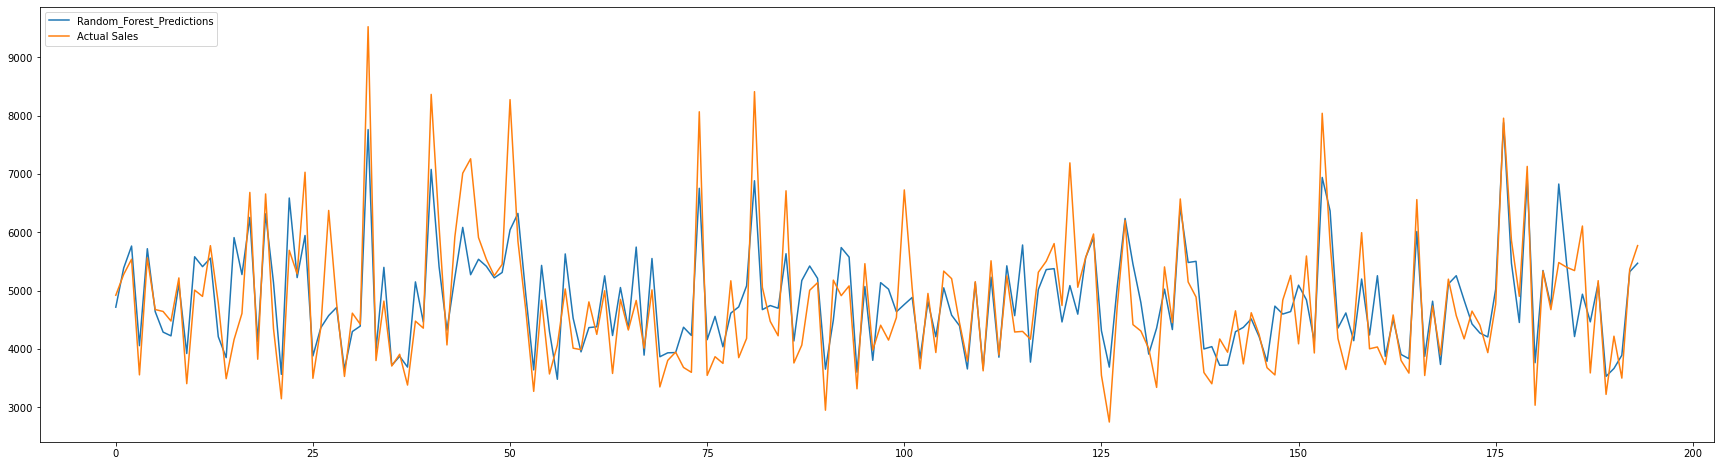

In [27]:
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(test_labels,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

#### Residual Histogram

<AxesSubplot:ylabel='Density'>

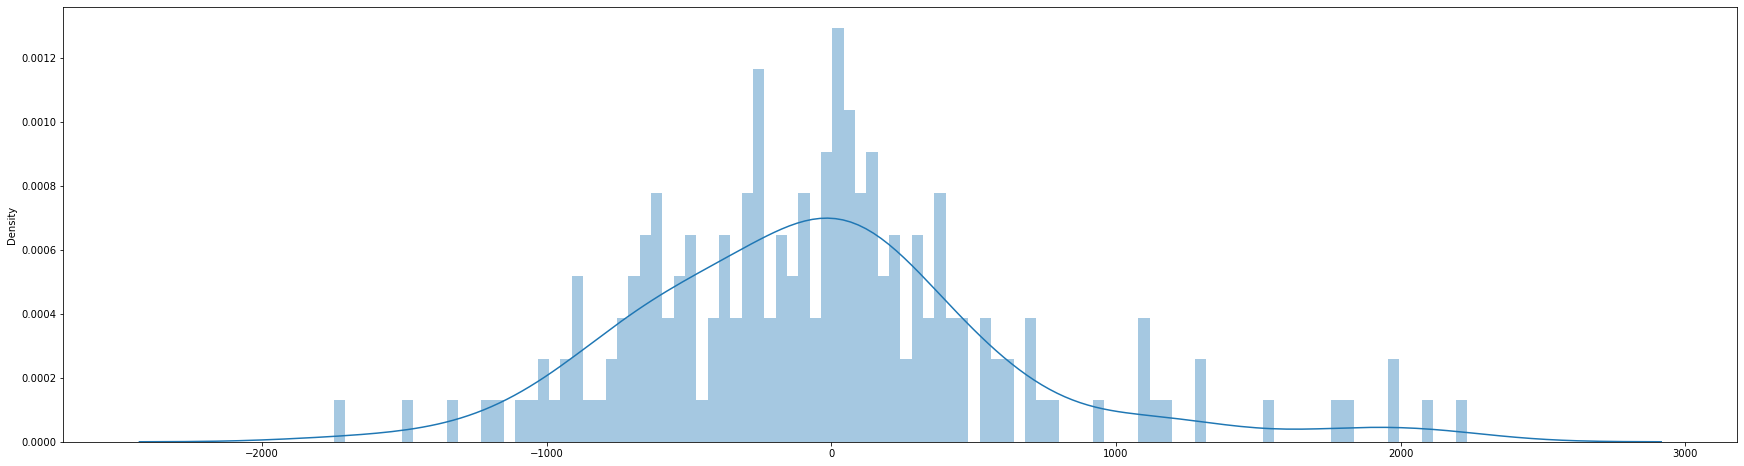

In [33]:
sns.distplot((test_labels-pred),bins=100)

In [29]:
# Use the forest's predict method on the test data
predictions = reg_opt.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2),)

Mean Absolute Error: 479.94


In [30]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.94 %.


In [31]:
# Get numerical feature importances
importances = list(reg_opt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Sale_previous_day    Importance: 0.47
Variable: Sale_2days_back      Importance: 0.11
Variable: Sale_5days_back      Importance: 0.08
Variable: Sale_4days_back      Importance: 0.07
Variable: dayofyear            Importance: 0.06
Variable: day                  Importance: 0.05
Variable: Sale_3days_back      Importance: 0.05
Variable: week                 Importance: 0.03
Variable: weekofyear           Importance: 0.03
Variable: dayofweek            Importance: 0.02
Variable: weekday              Importance: 0.02
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: quarter              Importance: 0.0
